In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

df = pd.read_pickle('data/acc_raw_ver02.pkl')
df = df[~df['음주운전'].isnull()]
y_train = df['음주운전']
x_train = df.drop(columns='음주운전')
cat_list = df.select_dtypes(['object']).columns.tolist()
num_list = df.select_dtypes(['number']).drop(columns='음주운전').columns.tolist()
x_train[cat_list] = x_train[cat_list].fillna('UNK')

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(nan_mode='Min',
                        eval_metric='Logloss',
                        iterations=220,
                        sampling_frequency='PerTree',
                        leaf_estimation_method='Newton',
                        grow_policy='SymmetricTree',
                        penalties_coefficient=1,
                        boosting_type='Plain',
                        model_shrink_mode='Constant',
                        feature_border_type='GreedyLogSum',
                        l2_leaf_reg=1,
                        random_strength=0.2,
                        rsm=1,
                        boost_from_average=False,
                        model_size_reg=0.5,
                        subsample=0.8,
                        depth=9,
                        posterior_sampling=False,
                        border_count=254,
                        classes_count=0,
                        auto_class_weights=None,
                        sparse_features_conflict_fraction=0,
                        leaf_estimation_backtracking='AnyImprovement',
                        best_model_min_trees=1,
                        model_shrink_rate=0,
                        min_data_in_leaf=1,
                        loss_function='Logloss',
                        learning_rate=0.1,
                        score_function='Cosine',
                        leaf_estimation_iterations=10,
                        bootstrap_type='MVS',
                        max_leaves=512)
cb.fit(x_train, y_train, cat_features=cat_list)

0:	learn: 0.5495090	total: 120ms	remaining: 26.2s
1:	learn: 0.4495783	total: 152ms	remaining: 16.5s
2:	learn: 0.3655201	total: 209ms	remaining: 15.1s
3:	learn: 0.3075922	total: 266ms	remaining: 14.3s
4:	learn: 0.2656748	total: 318ms	remaining: 13.7s
5:	learn: 0.2354564	total: 373ms	remaining: 13.3s
6:	learn: 0.2138456	total: 425ms	remaining: 12.9s
7:	learn: 0.1970177	total: 478ms	remaining: 12.7s
8:	learn: 0.1841855	total: 526ms	remaining: 12.3s
9:	learn: 0.1743302	total: 575ms	remaining: 12.1s
10:	learn: 0.1672723	total: 628ms	remaining: 11.9s
11:	learn: 0.1619311	total: 680ms	remaining: 11.8s
12:	learn: 0.1568946	total: 726ms	remaining: 11.6s
13:	learn: 0.1539405	total: 781ms	remaining: 11.5s
14:	learn: 0.1509059	total: 835ms	remaining: 11.4s
15:	learn: 0.1482278	total: 882ms	remaining: 11.2s
16:	learn: 0.1463843	total: 934ms	remaining: 11.2s
17:	learn: 0.1445256	total: 986ms	remaining: 11.1s
18:	learn: 0.1429231	total: 1.03s	remaining: 10.9s
19:	learn: 0.1415842	total: 1.08s	remaini

162:	learn: 0.0949448	total: 9.16s	remaining: 3.2s
163:	learn: 0.0946952	total: 9.21s	remaining: 3.14s
164:	learn: 0.0944027	total: 9.26s	remaining: 3.09s
165:	learn: 0.0943248	total: 9.31s	remaining: 3.03s
166:	learn: 0.0940938	total: 9.38s	remaining: 2.98s
167:	learn: 0.0939664	total: 9.43s	remaining: 2.92s
168:	learn: 0.0938029	total: 9.49s	remaining: 2.86s
169:	learn: 0.0936182	total: 9.55s	remaining: 2.81s
170:	learn: 0.0933932	total: 9.6s	remaining: 2.75s
171:	learn: 0.0931881	total: 9.65s	remaining: 2.69s
172:	learn: 0.0929997	total: 9.71s	remaining: 2.64s
173:	learn: 0.0927314	total: 9.76s	remaining: 2.58s
174:	learn: 0.0925883	total: 9.82s	remaining: 2.52s
175:	learn: 0.0924129	total: 9.87s	remaining: 2.47s
176:	learn: 0.0922710	total: 9.93s	remaining: 2.41s
177:	learn: 0.0920457	total: 9.98s	remaining: 2.35s
178:	learn: 0.0918645	total: 10s	remaining: 2.3s
179:	learn: 0.0918067	total: 10.1s	remaining: 2.25s
180:	learn: 0.0915999	total: 10.2s	remaining: 2.19s
181:	learn: 0.091

In [3]:
df['pred'] = cb.predict(x_train)

In [4]:
df[(df['음주운전']==df['pred']) & (df['음주운전']==1)]

,사고월,사고일,사고시각,사고요일,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형_대범주,...,가해운전자차종,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,음주운전,pred
my_id,,,,,,,,,,,,,,,,,,,,,
A000104,1,16,23,2,은평구,0,0,2,0,차대차,...,승용,남,37.0,상해없음,승용,남,19.0,경상,1.0,1.0
A000127,5,19,8,6,강북구,0,0,1,0,차대차,...,승용,남,31.0,상해없음,승용,남,47.0,경상,1.0,1.0
A000136,8,21,3,4,구로구,0,0,1,0,차대차,...,승용,남,30.0,상해없음,승용,남,62.0,경상,1.0,1.0
A000262,1,3,4,4,동작구,0,0,1,0,차대차,...,승용,여,27.0,상해없음,승용,남,70.0,경상,1.0,1.0
A000286,3,27,1,2,강남구,0,0,3,0,차대차,...,승용,여,38.0,상해없음,승용,남,59.0,상해없음,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A074197,11,12,21,3,송파구,0,0,1,0,차대차,...,승용,남,41.0,상해없음,승용,남,66.0,경상,1.0,1.0
A074249,12,1,22,1,중구,0,0,1,0,차량단독,...,이륜,남,28.0,경상,NaN,NaN,NaN,NaN,1.0,1.0
A074271,1,19,0,5,동작구,0,0,4,0,차대차,...,승용,남,32.0,상해없음,승용,남,74.0,경상,1.0,1.0


In [5]:
import shap

In [6]:
shap.initjs()

In [7]:
idx = np.where(x_train.index=='A000104')[0]
idxs = np.where(x_train.index.isin(df[(df['음주운전']==df['pred']) & (df['음주운전']==1)].index))[0]
my_sample = df.iloc[idx]
my_sample

,사고월,사고일,사고시각,사고요일,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형_대범주,...,가해운전자차종,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,음주운전,pred
my_id,,,,,,,,,,,,,,,,,,,,,
A000104,1,16,23,2,은평구,0,0,2,0,차대차,...,승용,남,37.0,상해없음,승용,남,19.0,경상,1.0,1.0


In [8]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(x_train)

In [9]:
pd.DataFrame({'col':x_train.columns, 'importance':cb.get_feature_importance()}).sort_values('importance',ascending=False)

,col,importance
2,사고시각,19.420687
18,가해운전자연령,15.885010
10,사고유형_소범주,6.912502
16,가해운전자차종,5.978159
4,사고지역,5.512746
11,법규위반,5.465499
22,피해운전자연령,4.887620
20,피해운전자차종,4.553872
1,사고일,4.449618
3,사고요일,3.983788


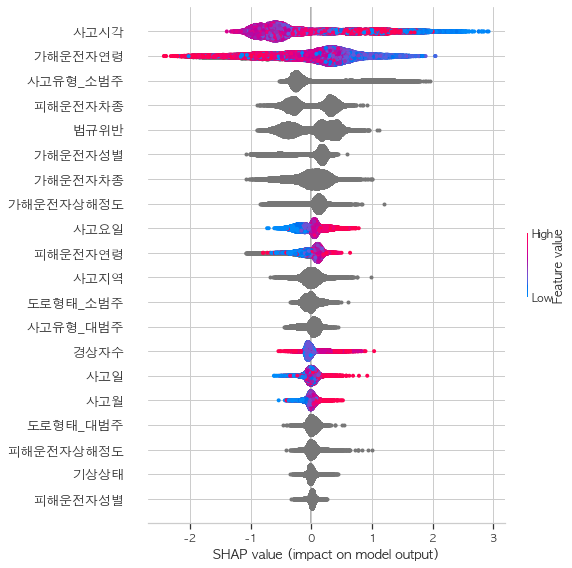

In [10]:
shap.summary_plot(shap_values, x_train)

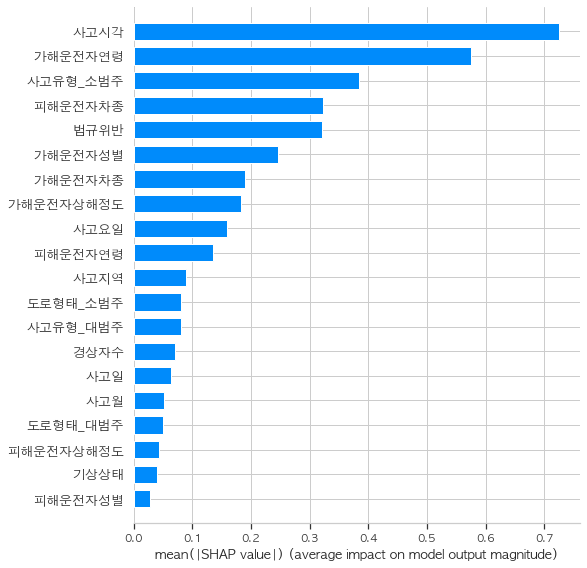

In [11]:
shap.summary_plot(shap_values, x_train, plot_type='bar')

In [12]:
shap.force_plot(explainer.expected_value, shap_values[idx,:], x_train.iloc[idx,:])

In [13]:
shap.force_plot(explainer.expected_value, shap_values[idxs,:], x_train.iloc[idxs,:])

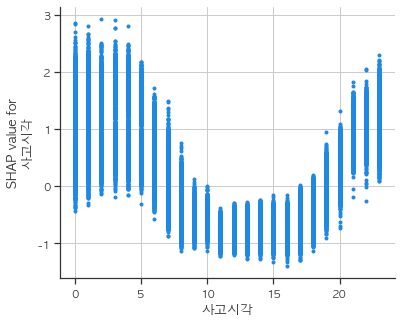

In [14]:
shap.dependence_plot('사고시각', shap_values, x_train, interaction_index=None)

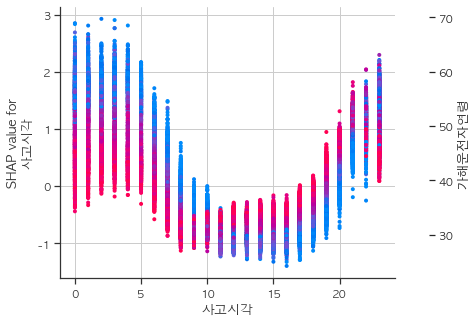

In [15]:
shap.dependence_plot('사고시각', shap_values, x_train)

- Clustering과의 결합

In [16]:
from pycaret.clustering import *
s = setup(x_train, normalize=True, categorical_features=cat_list, numeric_features=num_list)

,Description,Value
0,session_id,6853
1,Original Data,"(59589, 24)"
2,Missing Values,True
3,Numeric Features,10
4,Categorical Features,14
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(59589, 146)"
9,CPU Jobs,-1


In [17]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0545,3469.8416,3.305,0,0,0


In [18]:
result = assign_model(kmeans, transformation=True)
result02 = assign_model(kmeans)
result.head()

,사고월,사고일,사고시각,사고요일,사망자수,중상자수,경상자수,부상신고자수,가해운전자연령,피해운전자연령,...,피해운전자성별_남,피해운전자성별_여,피해운전자상해정도_UNK,피해운전자상해정도_경상,피해운전자상해정도_기타불명,피해운전자상해정도_부상신고,피해운전자상해정도_사망,피해운전자상해정도_상해없음,피해운전자상해정도_중상,Cluster
my_id,,,,,,,,,,,,,,,,,,,,,
A000002,-0.771267,0.006995,-1.379635,0.059937,-0.080431,1.489736,-1.035911,-0.26386,0.707408,1.586474,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cluster 3
A000003,-1.065335,-1.484219,1.380068,-0.976506,-0.080431,-0.525105,0.016065,-0.26386,1.158303,-0.334230,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cluster 2
A000004,-0.477199,0.121704,0.730726,0.578158,-0.080431,-0.525105,0.016065,-0.26386,-0.387621,1.090808,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cluster 1
A000005,1.287209,0.236413,-1.054964,-1.494727,-0.080431,1.489736,-1.035911,-0.26386,0.578582,0.719059,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cluster 3
A000006,-0.477199,0.580540,0.081384,-0.976506,-0.080431,-0.525105,0.016065,-0.26386,0.256514,-0.458146,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cluster 2


In [45]:
cluster_summary = result.groupby('Cluster').mean()
cluster_summary02 = result02.groupby('Cluster').mean().join(result02.select_dtypes('object').groupby('Cluster').agg(lambda x:x.mode()))
cluster_summary02 = cluster_summary02[x_train.columns]
cluster_summary.T

Cluster,Cluster 0,Cluster 1,Cluster 2,Cluster 3
사고월,0.012376,0.005507,0.009567,-0.028776
사고일,0.002964,0.010288,-0.001585,-0.014252
사고시각,0.009614,-0.051362,0.067650,-0.033108
사고요일,0.042067,0.867933,-0.833237,-0.016879
사망자수,0.711747,-0.079801,-0.080431,-0.078547
...,...,...,...,...
피해운전자상해정도_기타불명,0.014826,0.006682,0.005724,0.004540
피해운전자상해정도_부상신고,0.391304,0.000557,0.000243,0.000605
피해운전자상해정도_사망,0.042812,0.000000,0.000000,0.000000
피해운전자상해정도_상해없음,0.314010,0.120217,0.107063,0.086183


In [46]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(cluster_summary02)

In [51]:
shap.force_plot(explainer.expected_value, shap_values,cluster_summary02, figsize=20)